<a href="https://colab.research.google.com/github/MyDearGreatTeacher/TF/blob/master/TF_XOR_GOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用 TensorFlow 學習多層感知機(Multilayer Perceptron)

https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/learn-multilayer-perceptron-with-tensorflow-e73062ff0844

Instructions for updating:
Colocations handled automatically by placer.
[[1.2729839e-07]
 [9.9999869e-01]
 [9.9999917e-01]
 [1.4534787e-06]]


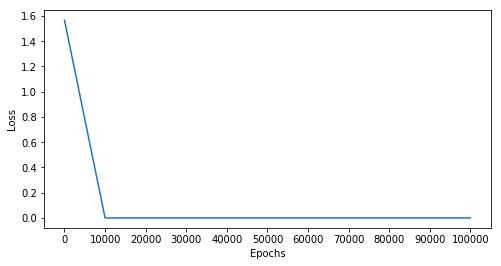

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 定義 data 與 label
x_ = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_ = np.array([[0], [1], [1], [0]])

# 定義節點
X = tf.placeholder(shape=(None, 2), dtype=tf.float32)
w1 = tf.Variable(tf.random_normal(shape=(2,4)))
b1 = tf.Variable(tf.random_normal(shape=(1,4)))
w2 = tf.Variable(tf.random_normal(shape=(4,1)))
b2 = tf.Variable(tf.random_normal(shape=(1,1)))
y = tf.placeholder(shape=(4,1), dtype=tf.float32)

# 定義隱藏層與輸出層
hidden_layer = tf.sigmoid(tf.matmul(X, w1) + b1)
output_layer = tf.sigmoid(tf.matmul(hidden_layer, w2) + b2)

# 損失函數
loss = tf.reduce_sum(tf.square(y - output_layer))
# 訓練方法
train = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)

# 初始化計算圖
init = tf.global_variables_initializer()

# 訓練類神經網路
sess = tf.Session()
sess.run(init)
losses = []
epochs = 100000
for epoch in range(epochs+1):
    sess.run(train, feed_dict={X: x_, y: y_})
    if epoch % 10000 == 0:
        losses.append(sess.run(loss, feed_dict={X: x_, y: y_}))
            
# 輸出預測值
print(sess.run(output_layer, feed_dict={X: x_}))

# 繪製 loss 曲線
plt.figure(figsize=(8, 4))
plt.plot(np.linspace(0, 100000, 11), losses)
plt.xticks(np.linspace(0, 100000, 11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
sess.close()